In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *
data_path = "../data/sgdm_wobn"
image_path = "./images"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/noreg"),
                        lambda js : np.log(js["optimizer"]["lr"]), 
                        lambda p : max_acc(get_stats(p,"test_stats")),
                        plt, 
                        norm=False,
                        label="Noreg",
                        color=colors["noreg"],
                        alpha=0.15)
print("Max test accuracy of Standard is {0}% with lr {1}".format(round(100*y.max(),2),round(np.exp(x[y.argmax()]),6)))
plt.close()

Max test accuracy of Standard is 82.43% with lr 0.0128


Max test accuracy of Norm is 84.41% with p 1.0
Max test accuracy of CNorm is 86.9% with p 0.8
Max test accuracy of CNormU is 84.8% with p 0.8
Max test accuracy of GCStdU is 84.02% with p 1.0
Max test accuracy of wd is 84.17% with lambda 8e-05


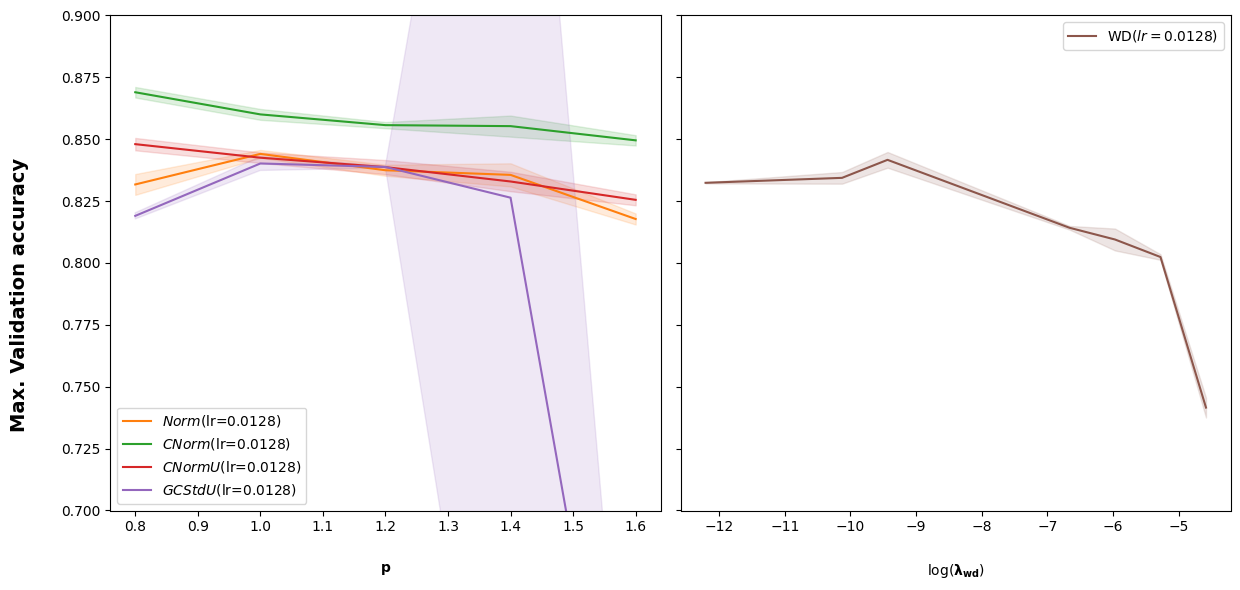

In [ ]:
plot_wobn_setting_hyperparam_max_acc(data_path,image_path,["Norm","CNorm","CNormU","GCStdU"],0.0128)

In [ ]:
exps = ["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0128$", r"Norm $p=1$", r"CNorm $p=0.8$", r"CNormU $p=0.8$", r"GCstdU $p=1$", r"WD $\lambda_{wd}=8e^{-5}$" ]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))

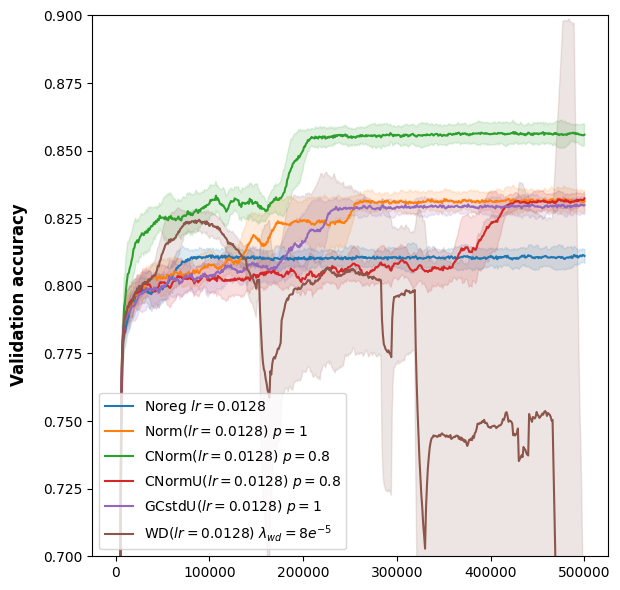

In [ ]:
plot_wobn_best_hyperparameter_validation_curve(data_path,image_path,
                                               ["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                                               [r"Noreg $lr = 0.0128$", r"Norm($lr = 0.0128$) $p=1$", r"CNorm($lr = 0.0128$) $p=0.8$", r"CNormU($lr = 0.0128$) $p=0.8$",
                                                 r"GCstdU($lr = 0.0128$) $p=1$", r"WD($lr = 0.0128$) $\lambda_{wd}=8e^{-5}$" ],
                                               ["noreg","norm","cnorm","cnormu","gcstdu","wd"],
                                               500000)

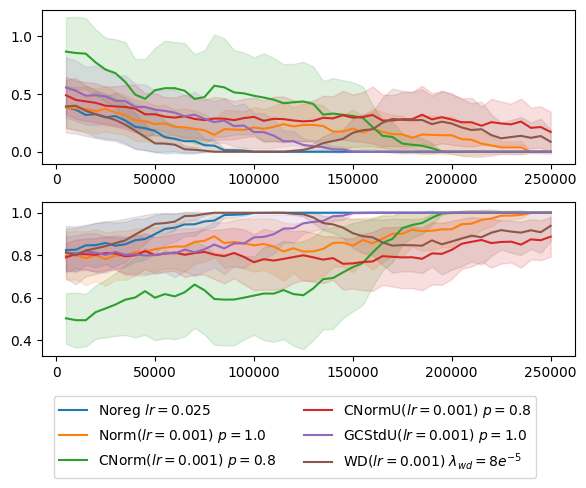

In [122]:
fig,axs = distribution_drift(data_path,["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"],
                             [r"Noreg $lr=0.025$","Norm($lr=0.001$) $p=1.0$","CNorm($lr=0.001$) $p=0.8$","CNormU($lr=0.001$) $p=0.8$","GCStdU($lr=0.001$) $p=1.0$",r"WD($lr=0.001$) $\lambda_{wd}=8e^{-5}$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]])
fig.set_size_inches(6,4)
fig.tight_layout()

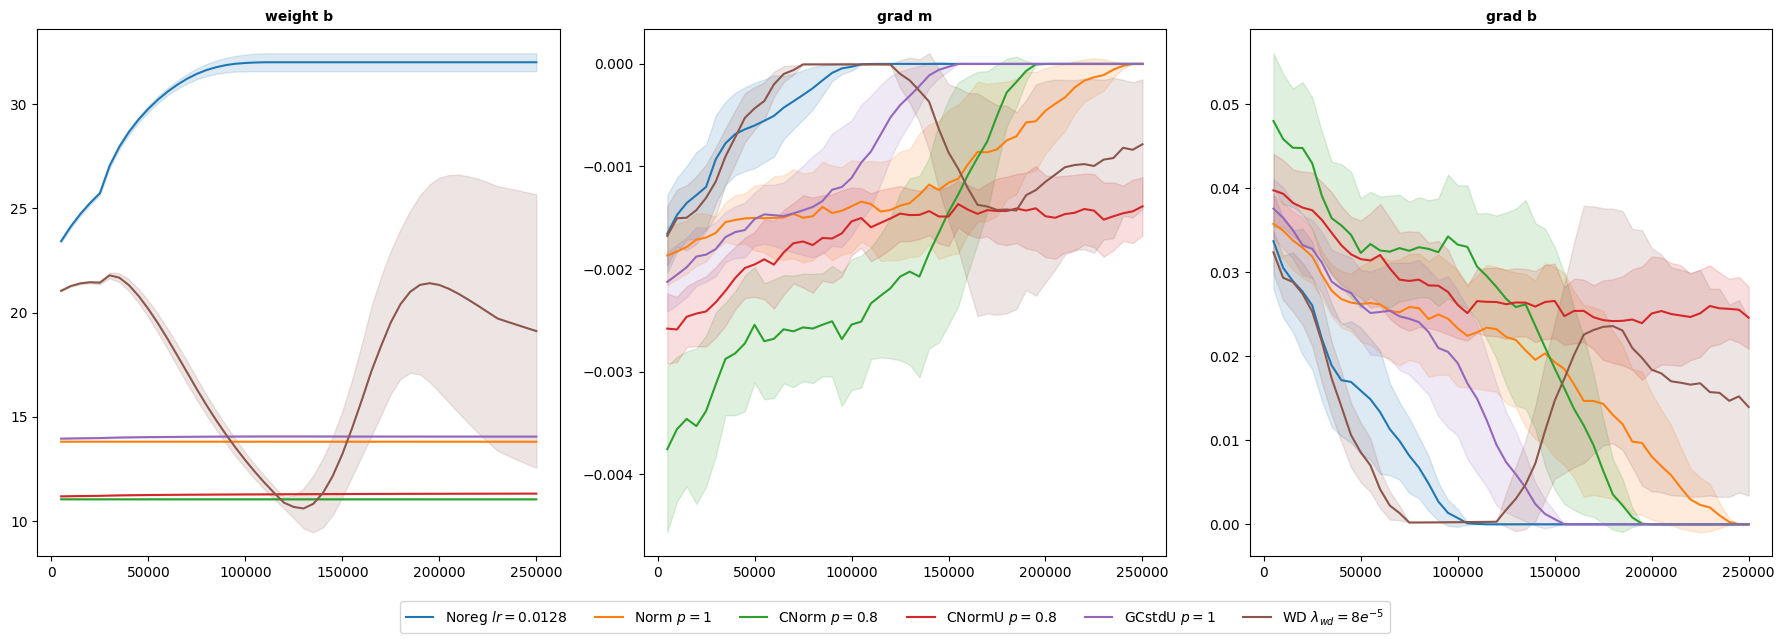

In [96]:
exps = ["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0128$", r"Norm $p=1$", r"CNorm $p=0.8$", r"CNormU $p=0.8$", r"GCstdU $p=1$", r"WD $\lambda_{wd}=8e^{-5}$" ]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = mg_spacing(data_path,exps,labels,colors,"mg_spacing_0")


In [15]:
path = f"{data_path}/norm/1.0_1/mg_spacing_0"
ckpt_paths_updates = get_ckpt_paths(path,"updates")
print(load(list(ckpt_paths_updates.values())[0])["Conv_0"]["bias"].shape)

(3, 64)


/home/miri/Documents/bachelorthesis/plots/plot_utils.py:579: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot({"x" : labels,"y" : mean},x = "x", y = "y",palette=colors,edgecolor="black",ax=axs[2])
/home/miri/Documents/bachelorthesis/plots/plot_utils.py:580: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(),rotation=70)


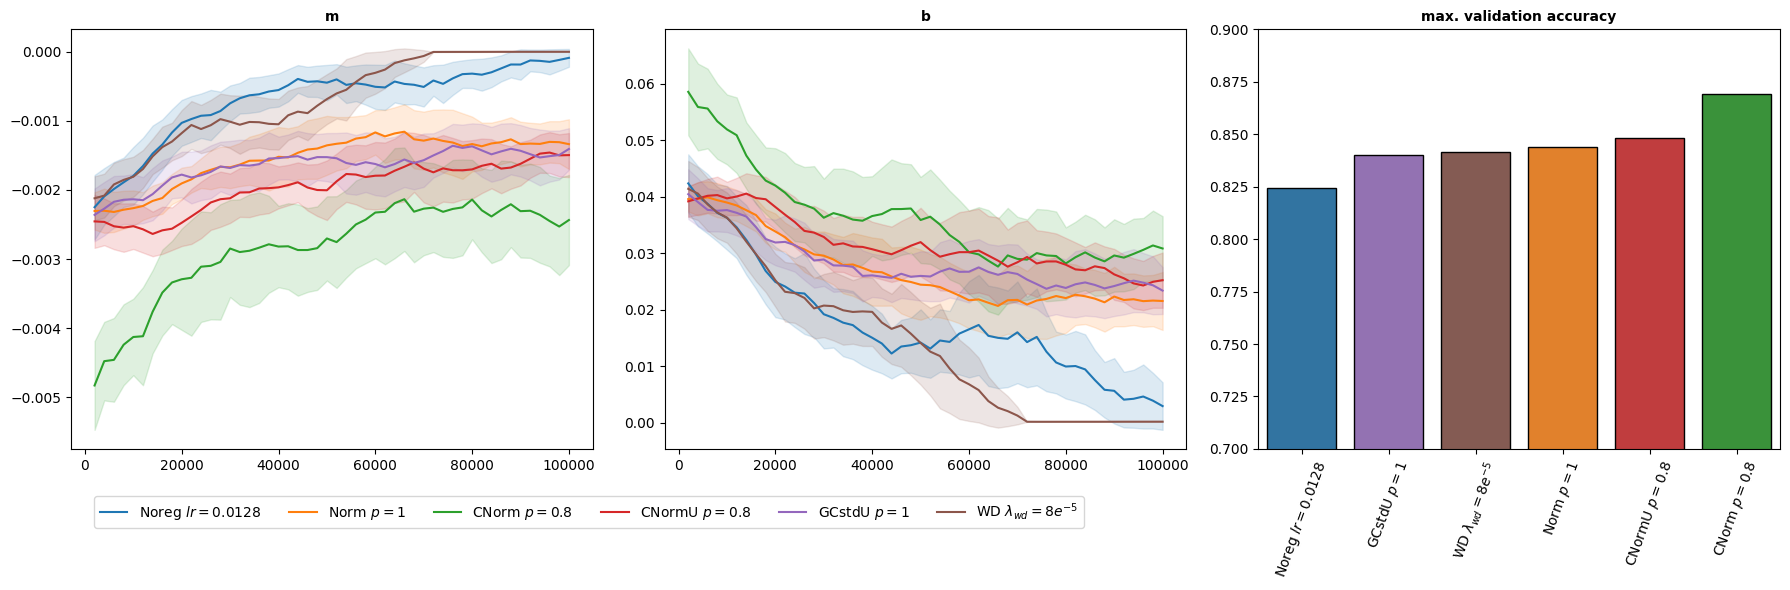

In [4]:
exps = ["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0128$", r"Norm $p=1$", r"CNorm $p=0.8$", r"CNormU $p=0.8$", r"GCstdU $p=1$", r"WD $\lambda_{wd}=8e^{-5}$" ]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = mg_spacing_and_bar_plot(data_path,exps,labels,colors,"mg_spacing_0","updates")


/home/miri/Documents/bachelorthesis/plots/plot_utils.py:537: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot({"x" : labels,"y" : mean},x = "x", y = "y",palette=colors,edgecolor="black",ax=axs[2])
/home/miri/Documents/bachelorthesis/plots/plot_utils.py:538: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(axs[2].get_xticklabels(),rotation=70)


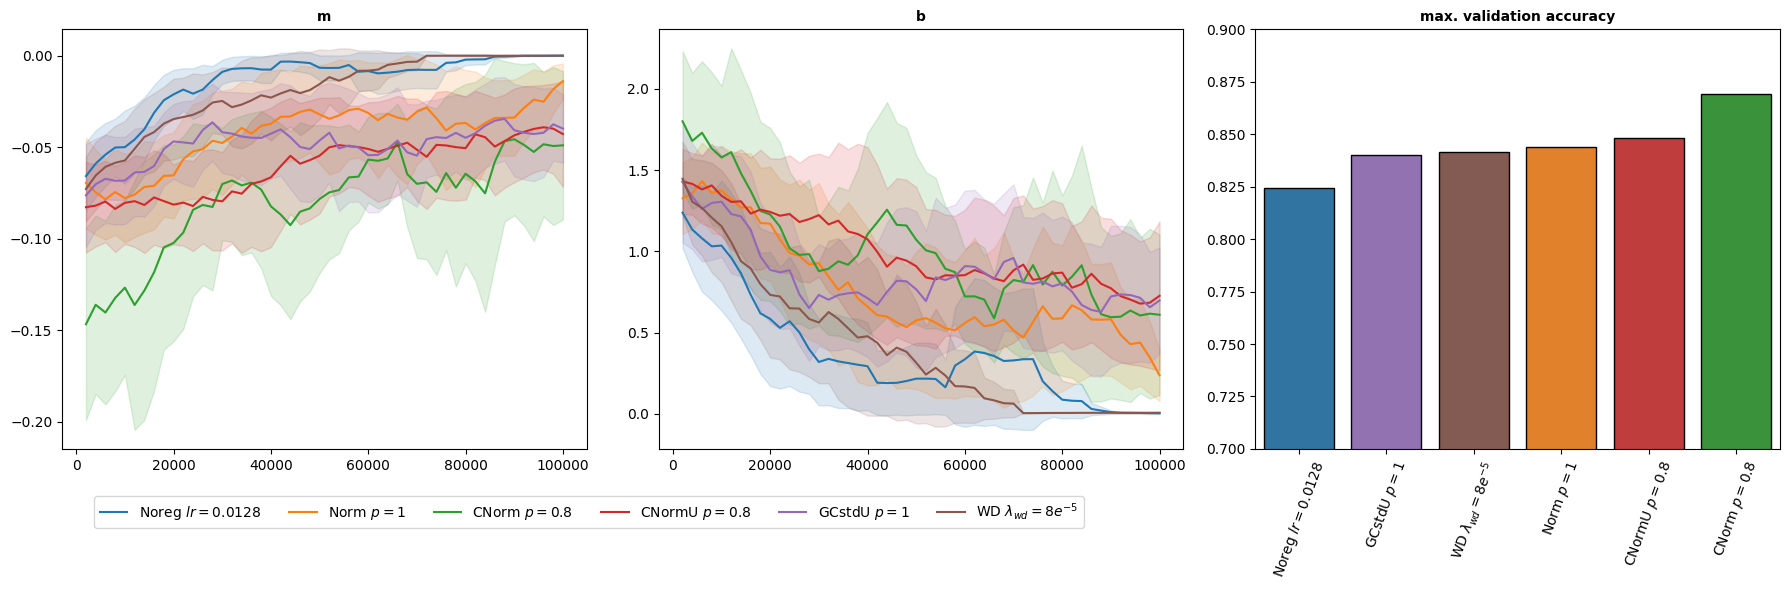

In [2]:
exps = ["noreg/0.0128","norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1","wd/8e-05"]
labels = [r"Noreg $lr = 0.0128$", r"Norm $p=1$", r"CNorm $p=0.8$", r"CNormU $p=0.8$", r"GCstdU $p=1$", r"WD $\lambda_{wd}=8e^{-5}$" ]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = mg_spacing_and_bar_plot(data_path,exps,labels,colors,"mg_spacing_0","grads")

#fig.savefig(f"{image_path}/mb_of_mg_spacing_0_100000_and_validation_accuracy_barplot.png", bbox_inches='tight',dpi=300)

/home/miri/miniconda3/envs/emecomspec/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/miri/miniconda3/envs/emecomspec/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


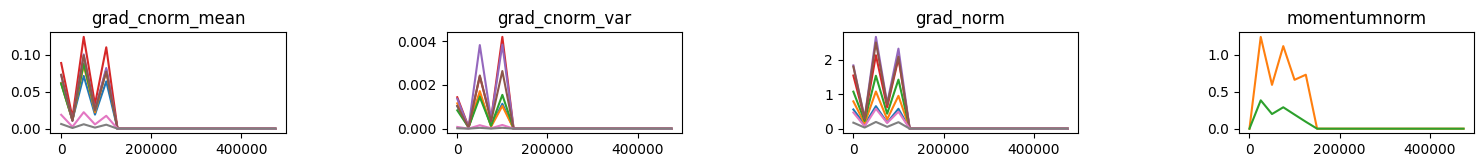

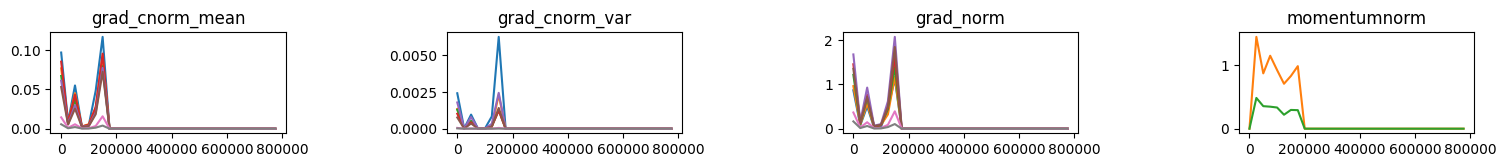

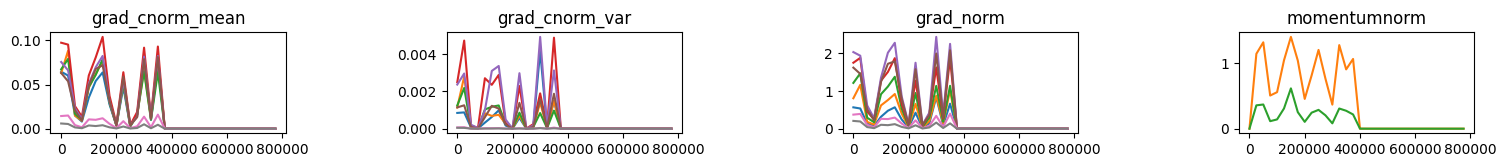

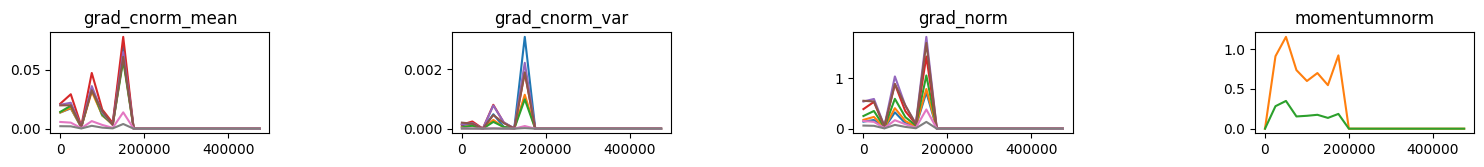

In [ ]:
for exp in ["norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1"]:
    fig,axs = plot_data(f"{data_path}/{exp}", lambda d :     
                        {0 :    {
                                0 :  
                                    ("grad_cnorm_mean", d["grad_cnorm_mean"]) , 
                                1 :  
                                    ("grad_cnorm_var", d["grad_cnorm_var"]) ,
                                2 :  
                                    ("grad_norm", d["grad_norm"]) , 
                                3 :  
                                    ("momentumnorm", d["momentumnorm"]) 
                                }})

    fig.tight_layout()
    fig.set_size_inches(16,1.2)
    #lines, labels = axs[0].get_legend_handles_labels()
    plt.show()